# Basics of neural networks 3 (TensorFlow and Keras)

### Making neural nets using TensorFlow and Keras

This notebook is a follow up to my NN Basics 2. This time we use TensorFlow and the Keras API that sits atop TensorFlow. TensorFlow is probably the most well-known machine learning module for enthusiasts and for good reason, since it allows even beginners to make various type of well working neural networks.

Time this we do need certain libraries/extensions that is not native to python. For now we only need TensorFlow and Keras along with Matplotlib for graphical visualization. There are many guides on how to install libraries on the internet. Here are my recommended versions (you might get away with other versions but these work for sure).

### Versions (recommended):
<ul>
  <li>Python 3.6</li>
  <li>TensorFlow 1.14.0</li>
  <li>Keras 2.2.4</li>
  <li>Matplotlib 3.1.0</li>    
</ul>

First we make the relevant imports.

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

To train our neural net, we will be using a data set called "mnist", which is kind of the world of ML's equivalent to "hello world" (maybe you have even seen it before if you have practiced clustering etc.). In short, the data set is a collection of 28x28 binary-pixel pictures of handwritten digits and there corresponding value.

Let's first get a feel for the data. We load the mnist data set and use matplotlib to display the first training sample and print the target value or label.

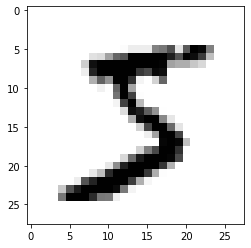

Label: 5


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

label = y_train[0]
print("Label: " + str(label))

As we can see the first sample is a 5. The data is divided into a training set (which of course is used for training) and a testing set (which is used for model validation). But before we proceed with our model creation, we need to normalize our data. Normally pixel values are between 0 and 255, however neural perform better on data between 0 and 1. Furthermore our data is in integers and we want it in floats.

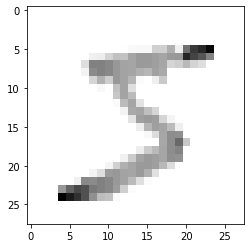

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Notice how the normalizing changes our data display slightly.

Next, it is time to build our model and train it. In TensorFlow the model creation and training process is as follows:
<ol>
  <li>Create model structure</li>
  <li>Compile model</li>
  <li>Fit the model to the data (training)</li>
  <li>Evaluate the model</li>
  <li>Make predictions based on the the model</li> 
</ol>

The structural step is very similar to the one we saw in NN Basics 2 - here I have created a DNN with 3 hidden layers (128, 256 and 128 neurons). The only difference is initial flattening layer along with a specification of the input shape, which makes small improvements to our networks overall performance. 

In the compiling step, we choose "how" our network learns, i.e. the optimizer, the way of measuring loss etc. If you seek a career in AI and ML, I would recommend that you actually learn what these are and how they work. <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers">Here</a> is a link to TensorFlow's optimizers, which is a good place to start. 

In the fitting step the model is fed the data for a number of epochs (iterations), here I picked 3.

The evaluation step returns the validation loss and accuracy, so we can check for over-fitting (more on that later).

Finally we can make predictions based on our trained model. The evaluation step is not necessary in order to make predictions, seeing and the model acts like an object, but evaluation step is a good indicator of our networks ability.

Training:
Epoch 1/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2422 - acc: 0.9252
Epoch 2/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1013 - acc: 0.9683
Epoch 3/3
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0700 - acc: 0.9781
Evaluating:
10000/10000 [==============================] - 1s 54us/sample - loss: 0.0935 - acc: 0.9721
Prediction:
7


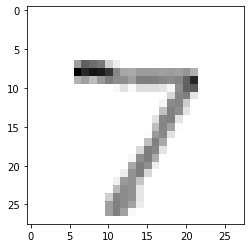

In [5]:
model = tf.keras.models.Sequential()  # model structure
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',  # model compiling
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('Training:')
model.fit(x_train, y_train, epochs=3)  # model training

print('Evaluating:')
val_loss, val_acc = model.evaluate(x_test, y_test)  # model evaluation

print('Prediction:')
predictions = model.predict(x_test)  # model predictions
print(np.argmax(predictions[0]))

plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

As we can see our model made the right prediction.

A significant challenge with neural nets is the issue of "over-fitting". In short, this means that the model ends up simply memorizing the training data as suppose to finding general patterns and thus the model is really good predicting in-training-samples but not good at predicting out-of-training-samples. This is where the evaluation step becomes really valuable. Of course we would expect our model to be a little more precise on in-training-samples, however, it should be almost as good for the out-of-training-samples. Our model seems not to have over-fitted (loss: 0.0700 - acc: 0.9781 vs val_loss: 0.0935 - val_acc: 0.9721), but how do we make sure and more importantly how do we find the most optimal parameters for a given task? Here are some things worth considering:
<ul>
  <li>Optimal number of layers</li>
  <li>Optimal number of neurons in layers</li>
  <li>Optimal number of epoch</li>
  <li>Optimal compiling parameters</li> 
</ul>

### Using Keras and TensorBoard 
TensorBoard is an excellent way to evaluate and compare the which parameters are optimal for a given problem. TensorBoard creates a separate folder of the training results that can be displayed and inspected. Here we are gonna make basically the same model as before, but we are going to run it for 10 epochs to see if we can figure out the optimal number of epochs. We will also be using concrete imports straight from keras (the same can be achieved by using tf.keras.XXXXXX). Notice how this makes our model look more intuitive.

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import TensorBoard
import time

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

tensorboard = TensorBoard(log_dir="logs")

model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_split=0.3, callbacks=[tensorboard])

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 163us/step - loss: 0.2839 - acc: 0.9129 - val_loss: 0.1495 - val_acc: 0.9552
Epoch 2/10
42000/42000 [==============================] - 6s 152us/step - loss: 0.1152 - acc: 0.9638 - val_loss: 0.1271 - val_acc: 0.9627
Epoch 3/10
42000/42000 [==============================] - 6s 148us/step - loss: 0.0771 - acc: 0.9752 - val_loss: 0.1286 - val_acc: 0.9622
Epoch 4/10
42000/42000 [==============================] - 6s 147us/step - loss: 0.0581 - acc: 0.9819 - val_loss: 0.1052 - val_acc: 0.9684
Epoch 5/10
42000/42000 [==============================] - 6s 148us/step - loss: 0.0445 - acc: 0.9854 - val_loss: 0.1241 - val_acc: 0.9671
Epoch 6/10
42000/42000 [==============================] - 6s 147us/step - loss: 0.0357 - acc: 0.9886 - val_loss: 0.1341 - val_acc: 0.9658
Epoch 7/10
42000/42000 [==============================] - 6s 150us/step - loss: 0.0301 - acc: 0.9898 - val_loss: 0.1254 - 

These data can then be viewed graphically with TensorBoard although I can't show it in Jupyter Notebook, but we can see that the val_loss breaks off after the 4th epoch, which can be a good indicator that the optimal number of epoch is 4. We could also change other parameters and compare everything and TensorBoard makes such a compassion much more manageable.

In these first 3 notebooks, we have only used regular ANNs and DNNs, however, mastering the TensorFlow basics truly opens the would of machine learning to you, including CNNs (Convolutional Neural Networks), RNNs (Recurrent Neural Networks), reinforcement learning, image and video recognition and so much more.